In [1]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [2]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [3]:
# Set up random seed to 1008. Do not change the random seed.
seed = 1008
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed_all(seed)

# 1. Full, slice, fill
Write a function `warm_up` that returns the 2D tensor with integers below. **Do not use any loops**.

```
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
```


Hint: Use `torch.full`, `torch.fill_`, and the slicing operator.

In [4]:
def warm_up():
    raise NotImplementedError()

def warm_up():
    # 1s
    t = torch.full((13, 13), 1)
    # 2s
    t[:, 1].fill_(2)
    t[:, 6].fill_(2)
    t[:, 11].fill_(2)
    t[1].fill_(2)
    t[6].fill_(2)
    t[11].fill_(2)
    # 3s
    t[3:5, 3:5].fill_(3)
    t[3:5, 8:10].fill_(3)
    t[8:10, 3:5].fill_(3)
    t[8:10, 8:10].fill_(3)
    return t

In [5]:
t = warm_up()
print(t)

tensor([[1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 2., 1., 3., 3., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 2., 1., 3., 3., 1., 2., 1.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 2., 1., 3., 3., 1., 2., 1.],
        [1., 2., 1., 3., 3., 1., 2., 1., 3., 3., 1., 2., 1.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.]])


# 2. To Loop or not to loop

## 2.1. `mul_row_loop`
Write a function `mul_row_loop`, using python loops (and not even slicing operators), that gets a 2D tensor
as input, and returns a tensor of same size, equal to the one given as argument, with the first row
kept unchanged, the second multiplied by two, the third by three, etc.
For instance:
```
>>> t = torch.full((4, 8), 2.0)
>>> t
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.]])
>>> mul_row(t)
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[4., 4., 4., 4., 4., 4., 4., 4.],
[6., 6., 6., 6., 6., 6., 6., 6.],
[8., 8., 8., 8., 8., 8., 8., 8.]])
```

In [6]:
def mul_row_loop(input_tensor):
    raise NotImplementedError()

def mul_row_loop(input_tensor):
    n_rows = input_tensor.size(0)
    for i in range(n_rows):
        input_tensor[i] = (i+1) * input_tensor[i]
    return input_tensor

In [7]:
t = torch.full((4, 8), 2.0)
mul_row_loop(t)

tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])

# 2.2. `mul_row_fast`
Write a second version of the same function named `mul_row_fast` which uses tensor operations and no looping.

**Hint**: Use broadcasting and `torch.arange`, `torch.view`, and `torch.mul`.

In [8]:
def mul_row_fast(input_tensor):
    raise NotImplementedError()

def mul_row_fast(input_tensor):
    n_rows = input_tensor.size(0)
    multipliers = torch.arange(1., n_rows + 1).view(n_rows, 1)
    return torch.mul(input_tensor, multipliers)

In [9]:
t = torch.full((4, 8), 2.0)
mul_row_fast(t)

tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])

# 2.3. `times`
Write a function `times` which takes a 2D tensor as input and returns the run times of `mul_row_loop` and `mul_row_fast` on this tensor, respectively. Use `time.perf_counter`.

Use `torch.ones` to create a 2D tensor of size (1000, 400) full of ones and run `times` on it (there should be more than two orders of magnitude difference).

In [10]:
from time import perf_counter
def times(input_tensor):
    raise NotImplementedError()

def times(input_tensor):
    t1_start = perf_counter()
    mul_row_loop(input_tensor)
    t1_stop = perf_counter()
    t2_start = perf_counter()
    mul_row_fast(input_tensor)
    t2_stop = perf_counter()
    return t1_stop - t1_start, t2_stop - t2_start

input_tensor = torch.ones(1000, 400)
time_1, time_2 = times(input_tensor)
print('{}, {}'.format(time_1, time_2))

0.14225383999291807, 0.001351960003376007


# 3. Non-linearities

## 3.1. ReLU
ReLU (Rectified Linear Unit) is a non-linear activation fuction defined as:

$$y = \mathrm{max}(0,x)$$

Define a fully connected neural network `linear_fc_relu` which:
- takes 2 dimensional data as input and passes it through linear modules (`torch.nn.Linear`)
- has one hidden layer of dimension 5 
- has output dimension of 2
- has ReLu as an activation function

Create a tensor with input data $X$ of size (100, 2) using `torch.randn`. 

Following the example in https://github.com/Atcold/pytorch-Deep-Learning-Minicourse/blob/master/02-space_stretching.ipynb, visualize the output of passing `X` through the neural network `linear_fc_relu`.

## 3.2. Sigmoid
The sigmoid function is another popular choice for a non-linear activation function which maps its input to values in the interval $(0,1)$. It is formally defined as:

$$\sigma(x) = \frac{1}{1+ e^{-x}}$$

Define a new neural network `linear_fc_sigmoid` which is the same architecture as in part `3.1.` but with a sigmoid unit instead of ReLU. 

Using the same $X$ as in part `3.1`, visualize the output of passing `X` through the neural network `linear_fc_sigmoid`.

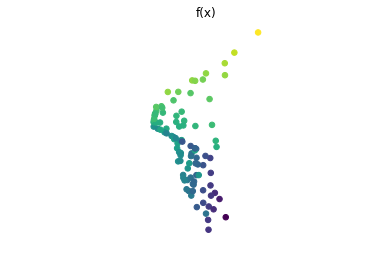

In [11]:
# Input data
n_points = 100
dim = 2
X = torch.randn(n_points, 2)
colors = X[:, 0]
n_hidden = 5

# create 1-layer neural networks with ReLU activation
linear_fc_relu = nn.Sequential(
        nn.Linear(dim, n_hidden), 
        nn.ReLU(), 
        nn.Linear(n_hidden, dim)
        )
linear_fc_relu.to(device)
with torch.no_grad():
    Y = linear_fc_relu(X)
show_scatterplot(Y, colors, title='f(x)')

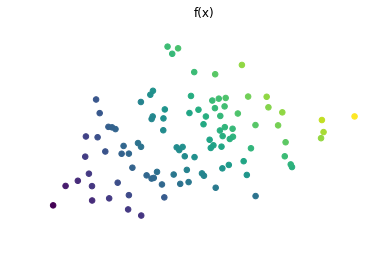

In [12]:
# create 1-layer neural networks with ReLU activation
linear_fc_sigmoid = nn.Sequential(
        nn.Linear(dim, n_hidden), 
        nn.Sigmoid(), 
        nn.Linear(n_hidden, dim)
        )
linear_fc_sigmoid.to(device)
with torch.no_grad():
    Y = linear_fc_sigmoid(X)
show_scatterplot(Y, colors, title='f(x)')